In [6]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.3/38.6 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 0.5/38.6 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.7/38.6 MB 3.1 MB/s eta 0:00:13
    --------------------------------------- 0.8/38.6 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.9/38.6 MB 3.1 MB/s eta 0:00:13
   - -------------------------------------- 1.1/38.6 MB 3.2 MB/s eta 0:00:12
   - ----------------

In [1]:
dir = 'C:\\Users\\hrush\\Desktop\\Task3\\Dataset'

In [7]:
categories = ['cats', 'dogs']

data = []

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv.imread(imgpath, 0)
        try:
            pet_img = cv.resize(pet_img, (100, 100), interpolation=cv.INTER_AREA)
            # print(pet_img.shape)
        except:
            break
        image = np.array(pet_img).flatten()
        data.append([image,label])

print(len(data))

5000


In [8]:
random.shuffle(data)

features = []
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [10]:
model = SVC(C=1, kernel='poly', gamma='auto') 
model.fit(x_train,y_train)


SVC(C=1, gamma='auto', kernel='poly')

Accuracy : 0.602
Prediction is dogs


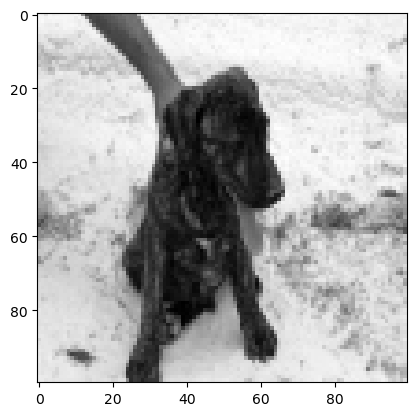

In [11]:
mypet = x_test[2].reshape(100,100)
prediction = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print('Accuracy :', accuracy)
print('Prediction is', categories[prediction[2]])
plt.imshow(mypet, cmap ='gray')
plt.show()